In [59]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.text import Tokenizer

BASE_DIR = ''
GLOVE_DIR = BASE_DIR + '../glove/' # http://nlp.stanford.edu/projects/glove/ pretrained vectors
TEXT_DATA_DIR = '../data/'
HEADER = True

In [58]:
X = []
y = []

with open(os.path.join(TEXT_DATA_DIR, "imdb_small.csv"), "r") as f:
    if HEADER:
        header = next(f)
    for line in f:
        line = line.strip()

        if line[0] not in ["0", "1"] or line[1] != "|":
            print("bad form of line", line)
            continue

        temp_y = line[0]
        temp_x = line[2:]

        X.append(temp_x)
        y.append(temp_y)


In [49]:
data = pd.DataFrame({"class":y, "text": X})
data[:3]

,class,text
0,0,Once again Mr. Costner has dragged out a movie...
1,0,This is an example of why the majority of acti...
2,0,"First of all I hate those moronic rappers, who..."


In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [50]:
seqs = tokenizer.texts_to_sequences(X)
data["tokens"] = [len(s) for s in seqs]
data[:3]

,class,text,tokens
0,0,Once again Mr. Costner has dragged out a movie...,168
1,0,This is an example of why the majority of acti...,239
2,0,"First of all I hate those moronic rappers, who...",231


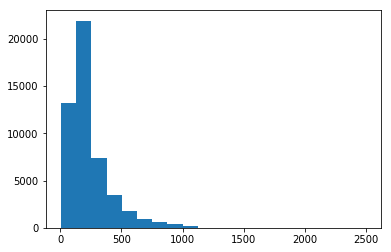

In [56]:
plt.hist(lengths, bins=20)
plt.show()